<a href="https://colab.research.google.com/github/anbr1x/Portafolio/blob/main/ProyectoParteIII%2BSanchez_Chavez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Abstrac:***

#### El presente proyecto tiene como objetivo aplicar técnicas de ciencia de datos para la creacion de un modelo de clasificacion binaria. sobre un conjunto de datos de transacciones bancarias, con el fin de identificar posibles casos de fraude financiero. El dataset utilizado consta de 2,512 registros que incluyen atributos relacionados con el comportamiento transaccional, características del cliente y patrones de uso, tales como monto, ubicación, canal de transacción, tipo de dispositivo, entre otros.
#### La motivación del proyecto radica en poner en práctica los conocimientos adquiridos durante el curso, mediante la implementación de modelo de clasificacion binaria, con el fin de detectar anomalías que se desvíen significativamente del comportamiento normal. Estas técnicas permiten analizar tanto aspectos estadísticos como espaciales y temporales del conjunto de datos.
#### El enfoque del estudio está orientado a la prevención de fraudes, demostrando cómo herramientas de ciencia de datos pueden aportar valor en el análisis de seguridad financiera. A través de esta propuesta, se busca desarrollar habilidades prácticas en la detección de patrones inusuales que podrían alertar sobre actividades sospechosas en el sistema bancario.









# ***Preguntas de interés:***





1.   ¿Qué características transaccionales (como el monto, la ubicación o el canal utilizado) son más frecuentes en las transacciones consideradas anómalas?

2.   ¿Las transacciones realizadas con múltiples intentos de inicio de sesión tienden a comportarse como outliers?

3.   ¿Hay ocupaciones o rangos de edad que presenten un mayor número de transacciones atípicas?
4.   ¿Existen patrones atípicos en el comportamiento transaccional que puedan ser identificados por un modelo de clasificacion binaria que reflejen indicios de fraude?



# ***Hipotesis:***


0.   H₀(Hipótesis nula): Las técnicas de clasificacion binaria o el dataset no permiten detectar de manera efectiva outliers con una precisionsignificativa en el dataset de transacciones bancarias.

2.   H1: Las transacciones con montos extremos, ubicaciones atípicas o canales no habituales presentan mayor probabilidad de ser clasificadas como outliers.
3.   H2: Las transacciones precedidas por múltiples intentos de inicio de sesión tienen una mayor probabilidad de ser detectadas como outliers.
4.   H3: Existen ciertos rangos de edad u ocupaciones en los que se presentan más outliers, debido a variaciones en el comportamiento transaccional típico de esos grupos.

1.   H4: Existen patrones transaccionales inusuales que pueden ser detectados como outliers y representar posibles indicios de fraude.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ModeloClasificacion/bank_transactions_data_Clustered.csv")

In [ ]:
df.Cluster.value_counts() #el 3 son los outliers

,count
Cluster,
0,1133
1,880
2,404
3,95


In [ ]:
df_binary = df.copy().drop('DBSCAN_Cluster',axis=1)
df_binary.Cluster = df_binary.Cluster.map({1:0, 2:0, 2:0, 3:1}).fillna(df_binary.Cluster)

In [ ]:
df_binary.Cluster.value_counts()

,count
Cluster,
0.0,2417
1.0,95


In [ ]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df_binary.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,0.0


In [ ]:
df_binary.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,0.037818
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.190795
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,0.000000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,0.000000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,0.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,1.000000


# **Glosario:**

In [ ]:
import pandas as pd

# Definimos el Glosario
glosario = {
    'Columna': [
        'TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType',
        'Location', 'DeviceID', 'IP Address', 'MerchantID', 'AccountBalance',
        'PreviousTransactionDate', 'Channel', 'CustomerAge', 'CustomerOccupation',
        'TransactionDuration', 'LoginAttempts'
    ],
    'Descripción': [
        'Identificador único alfanumérico para cada transacción',
        'Identificador único para cada cuenta, con múltiples transacciones por cuenta',
        'Valor monetario de cada transacción, que varía desde pequeños gastos diarios hasta compras más grandes',
        'Marca temporal de cada transacción, capturando fecha y hora',
        'Campo categórico que indica transacciones de "Crédito" o "Débito"',
        'Ubicación geográfica de la transacción, representada por nombres de ciudades de EE.UU.',
        'Identificador alfanumérico para dispositivos utilizados para realizar la transacción',
        'Dirección IPv4 asociada con la transacción, con cambios ocasionales para algunas cuentas',
        'Identificador único para comerciantes, mostrando comerciantes preferidos y atípicos para cada cuenta',
        'Saldo en la cuenta después de la transacción, con correlaciones lógicas basadas en el tipo y monto de la transacción',
        'Marca temporal de la última transacción para la cuenta, ayudando a calcular la frecuencia de las transacciones',
        'Canal a través del cual se realizó la transacción (por ejemplo, en línea, cajero automático, sucursal)',
        'Edad del titular de la cuenta, con agrupaciones lógicas basadas en la ocupación',
        'Ocupación del titular de la cuenta (por ejemplo, médico, ingeniero, estudiante, jubilado), reflejando patrones de ingresos',
        'Duración de la transacción en segundos, variando según el tipo de transacción',
        'Número de intentos de inicio de sesión antes de la transacción, con valores más altos que indican posibles anomalías'
    ]
}

# Creamos DataFrame
df_glosario = pd.DataFrame(glosario)

# Mostramos tabla
df_glosario.style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'}).set_caption("Glosario de Variables del Dataset").hide(axis='index').set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16pt'), ('font-weight', 'bold')]
}])


Columna,Descripción
TransactionID,Identificador único alfanumérico para cada transacción
AccountID,"Identificador único para cada cuenta, con múltiples transacciones por cuenta"
TransactionAmount,"Valor monetario de cada transacción, que varía desde pequeños gastos diarios hasta compras más grandes"
TransactionDate,"Marca temporal de cada transacción, capturando fecha y hora"
TransactionType,"Campo categórico que indica transacciones de ""Crédito"" o ""Débito"""
Location,"Ubicación geográfica de la transacción, representada por nombres de ciudades de EE.UU."
DeviceID,Identificador alfanumérico para dispositivos utilizados para realizar la transacción
IP Address,"Dirección IPv4 asociada con la transacción, con cambios ocasionales para algunas cuentas"
MerchantID,"Identificador único para comerciantes, mostrando comerciantes preferidos y atípicos para cada cuenta"
AccountBalance,"Saldo en la cuenta después de la transacción, con correlaciones lógicas basadas en el tipo y monto de la transacción"


# EDA (Analisis Exploratorio)

# 1.¿Qué características transaccionales (como el monto, la ubicación o el canal utilizado) son más frecuentes en las transacciones consideradas anómalas?



## Monto


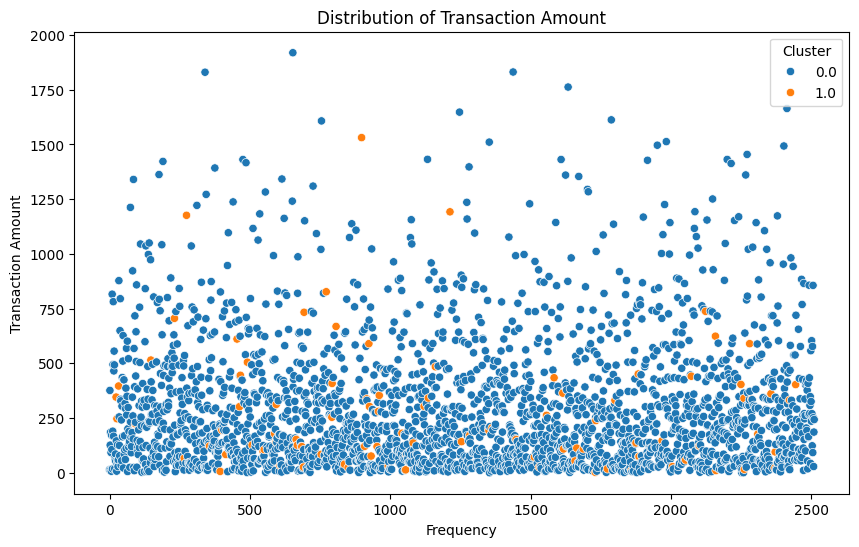

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x =df_binary.index ,y=df_binary['TransactionAmount'],hue=df_binary['Cluster'])
plt.ylabel('Transaction Amount')
plt.xlabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


## El grafico nos indica que, no necesariamente montos altos indican outliers.

---



## Ubicacion

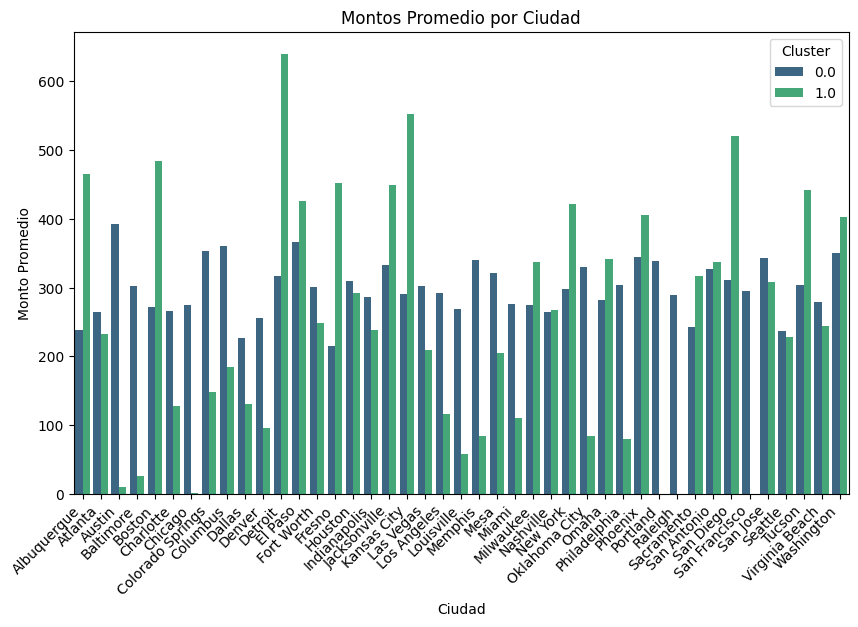

In [ ]:
# Barplot: Monto Promedio por Ciudad
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['Location', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='Location', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
top_outliers = location_cluster_mean[location_cluster_mean['Cluster']==1].sort_values('TransactionAmount',ascending=False).head(10)['Location'].tolist()
top_location = location_cluster_mean[location_cluster_mean['Location'].isin(top_outliers)]
df_pivot =  top_location.pivot(index='Location', columns='Cluster', values='TransactionAmount')
df_pivot['Diferencia'] = df_pivot[1] - df_pivot[0]
df_pivot.sort_values(by='Diferencia',ascending=False)

Cluster,0.0,1.0,Diferencia
Location,,,
Detroit,316.884918,639.890000,323.005082
Kansas City,290.544211,551.870000,261.325789
Fresno,215.266379,452.750000,237.483621
Albuquerque,238.061538,464.845000,226.783462
Boston,271.815500,484.300000,212.484500
San Diego,311.688545,519.885000,208.196455
Tucson,303.310606,441.260000,137.949394
New York,297.731636,421.663333,123.931697
Jacksonville,332.203455,449.656000,117.452545


## Existen ciudades donde el monto promedio de outliers es mayor al de transacciones estandar, como son:


*   Detroit
*   Kansas City
*   Fresno
*   Albuquerque





---



## Canal

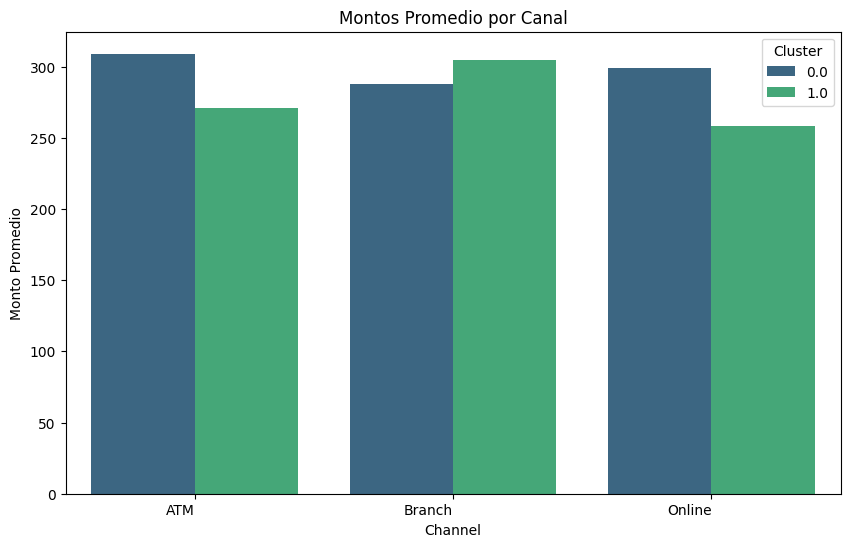

In [ ]:
# Barplot: Ventas promedio por Región
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['Channel', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='Channel', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Canal')
plt.xlabel('Channel')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## La atencion presencial tiene un monto de outliers ligeramente mayor a los montos de transcciones legitimas.

---



# 2.¿Las transacciones realizadas con múltiples intentos de inicio de sesión tienden a comportarse como outliers?


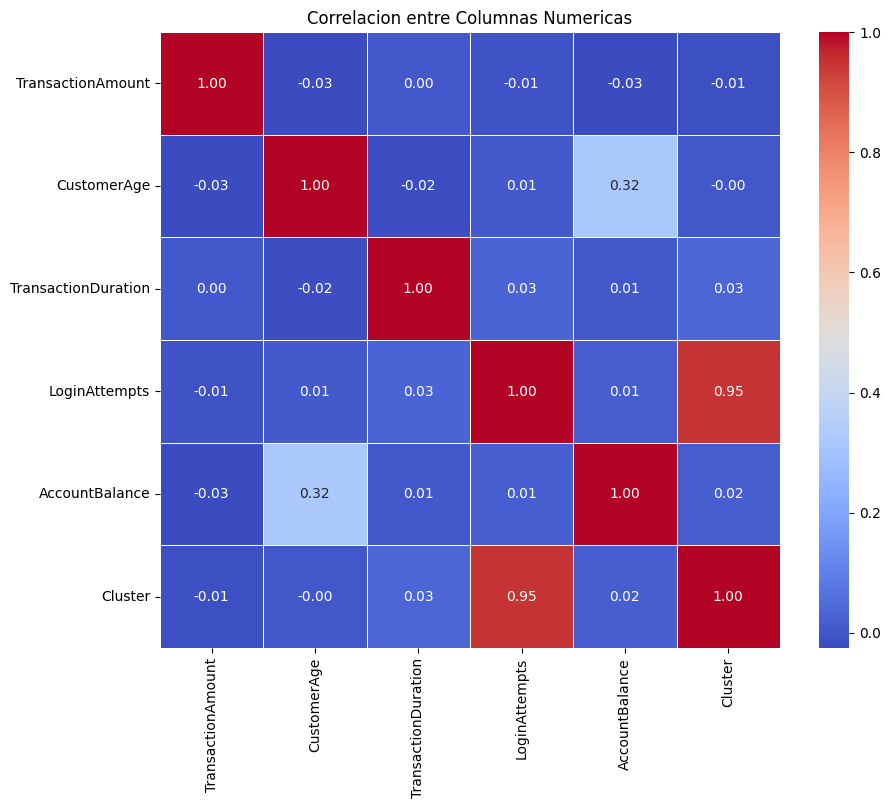

In [ ]:
correlation_matrix = df_binary[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','Cluster']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlacion entre Columnas Numericas')
plt.show()

## Podemos observar como un mayor numero de intentos de acceso se relaciona fuertemente con la clasificacion de outlier.



---





# 3.¿Hay ocupaciones o rangos de edad que presenten un mayor monto de transacciones atípicas?



## Rango de Edad

<ipython-input-15-0cf6a5b7c9bb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mean = df_binary.groupby(['AgeGroup', 'Cluster'])['TransactionAmount'].mean().reset_index()


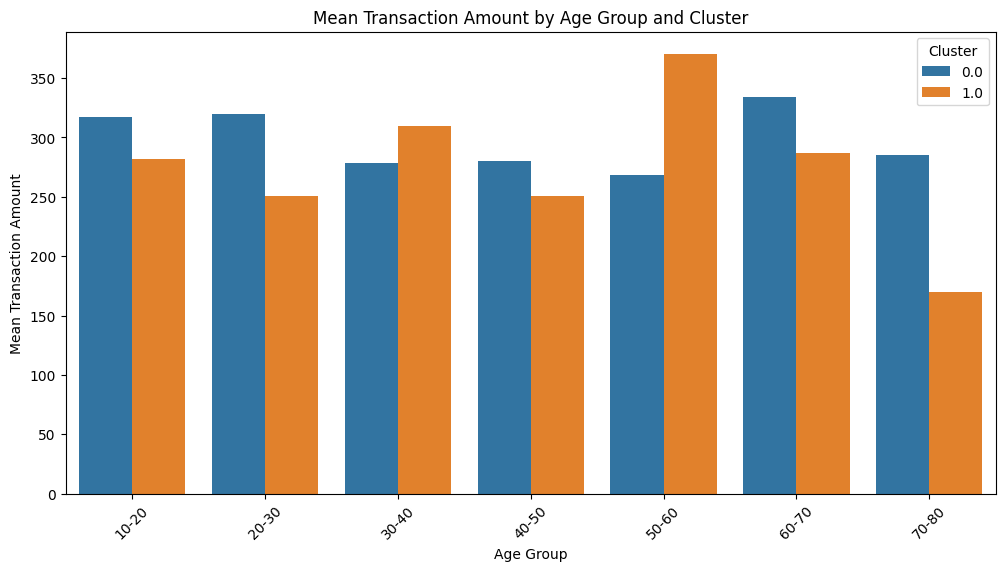

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de grupo de edad usando pd.qcut
labes_l = ["10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
df_binary['AgeGroup'] = pd.qcut(df_binary['CustomerAge'], q=7, labels=labes_l)

# Analizar el monto promedio de transacciones por grupo de edad y clúster
age_group_mean = df_binary.groupby(['AgeGroup', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Visualizar los datos usando un barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_mean, x='AgeGroup', y='TransactionAmount', hue='Cluster')
plt.title('Mean Transaction Amount by Age Group and Cluster')
plt.xlabel('Age Group')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)
plt.show()



## Los grupos de 30-40 y 50-60, son los unicos grupos en los que el monto promedio de transacciones es mayor en outliers que en transaccione legitimas.


---



## Ocupaciones

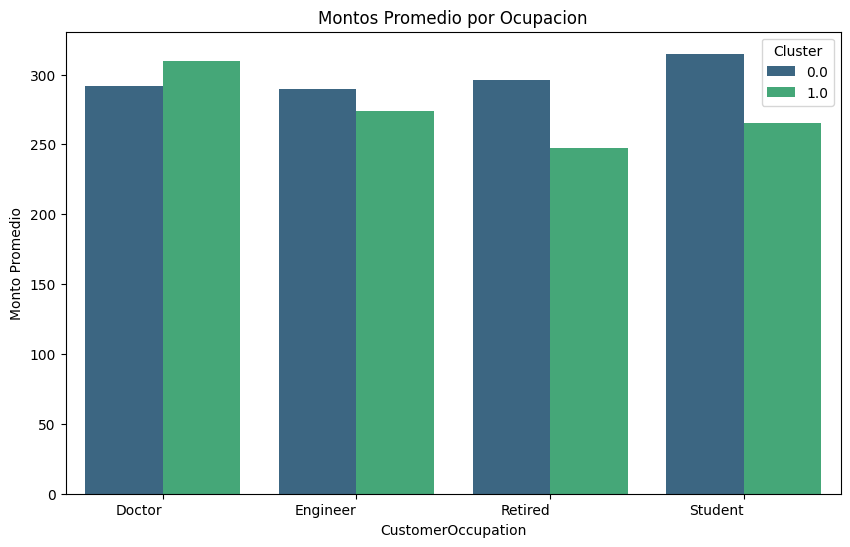

In [ ]:
# Barplot: Ventas promedio por Región
plt.figure(figsize=(10, 6))
# Calculate the mean Transaction Amount for each Location and Cluster
location_cluster_mean = df_binary.groupby(['CustomerOccupation', 'Cluster'])['TransactionAmount'].mean().reset_index()

# Use the calculated means for the barplot
sns.barplot(data=location_cluster_mean, x='CustomerOccupation', y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Montos Promedio por Ocupacion')
plt.xlabel('CustomerOccupation')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## La unica ocupacion en la que el monton promedio de transacciones es mayor en los casos de outliers, es en los medicos.


---




# Comprobacion de valores faltantes


In [ ]:
# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df_binary.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df_binary.isnull().sum() / len(df)) * 100)

Conteo de valores nulos por columna:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
Cluster                    0
AgeGroup                   0
dtype: int64

Porcentaje de valores nulos por columna:
TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDur

In [ ]:
import missingno as msno


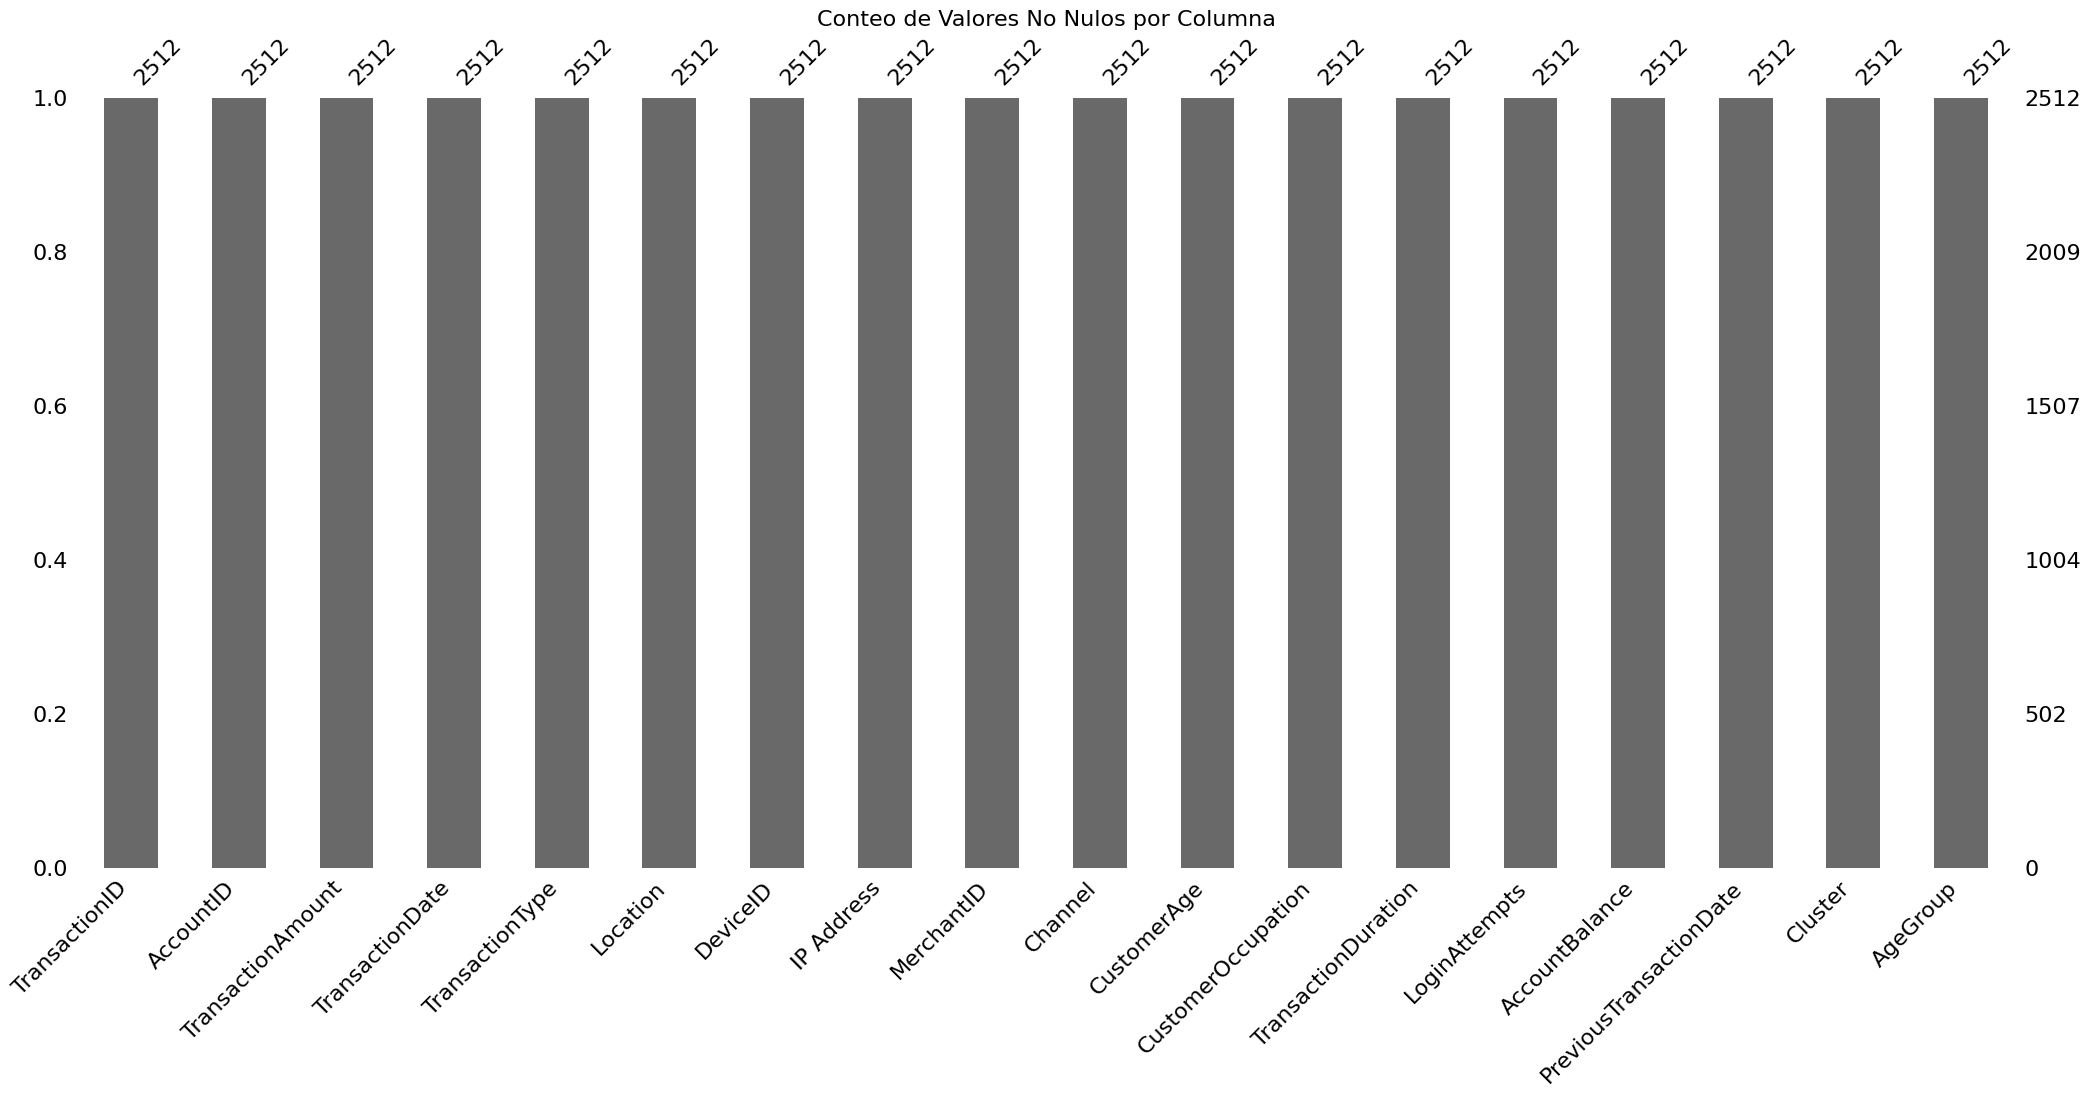

In [ ]:
# Gráfico de barras de ausentismo: similar a .isnull().sum() pero gráfico
msno.bar(df_binary)
plt.title('Conteo de Valores No Nulos por Columna', fontsize=16)
plt.show()

# No se encuentran valores faltantes


---



# Preprocesamiento de Datos

## Tratar columnas de fecha

In [ ]:
# Convertir a tipo de dato datetime
df_binary['TransactionDate'] = pd.to_datetime(df_binary['TransactionDate'])
df_binary['PreviousTransactionDate'] = pd.to_datetime(df_binary['PreviousTransactionDate'])

# Extraer características relevantes
df_binary['DayOfWeek'] = df_binary['TransactionDate'].dt.dayofweek
df_binary['Month'] = df_binary['TransactionDate'].dt.month
df_binary['Year'] = df_binary['TransactionDate'].dt.year

# Codificación cíclica
df_binary['DayOfWeek_sin'] = np.sin(2 * np.pi * df_binary['DayOfWeek'] / 7)
df_binary['DayOfWeek_cos'] = np.cos(2 * np.pi * df_binary['DayOfWeek'] / 7)

# Diferencias de tiempo
df_binary['TimeSinceLastTransaction'] = (df_binary['TransactionDate'] - df_binary['PreviousTransactionDate']).dt.days

In [ ]:
df_trasnform = df_binary.drop(['TransactionDate','PreviousTransactionDate','CustomerAge','DayOfWeek'],axis=1)

In [ ]:
df_trasnform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TransactionID             2512 non-null   object  
 1   AccountID                 2512 non-null   object  
 2   TransactionAmount         2512 non-null   float64 
 3   TransactionType           2512 non-null   object  
 4   Location                  2512 non-null   object  
 5   DeviceID                  2512 non-null   object  
 6   IP Address                2512 non-null   object  
 7   MerchantID                2512 non-null   object  
 8   Channel                   2512 non-null   object  
 9   CustomerOccupation        2512 non-null   object  
 10  TransactionDuration       2512 non-null   int64   
 11  LoginAttempts             2512 non-null   int64   
 12  AccountBalance            2512 non-null   float64 
 13  Cluster                   2512 non-null   float6

In [ ]:
df_trasnform

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster,AgeGroup,Month,Year,DayOfWeek_sin,DayOfWeek_cos,TimeSinceLastTransaction
0,TX000001,AC00128,14.09,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,81,1,5112.21,0.0,70-80,4,2023,0.781831,0.623490,-573
1,TX000002,AC00455,376.24,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,141,1,13758.91,0.0,70-80,6,2023,0.781831,0.623490,-496
2,TX000003,AC00019,126.29,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,56,1,1122.35,0.0,10-20,7,2023,0.000000,1.000000,-483
3,TX000004,AC00070,184.50,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,25,1,8569.06,0.0,20-30,5,2023,-0.433884,-0.900969,-549
4,TX000005,AC00411,13.45,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,198,1,7429.40,0.0,20-30,10,2023,0.000000,1.000000,-385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,109,1,12690.79,0.0,30-40,4,2023,0.974928,-0.222521,-558
2508,TX002509,AC00322,251.54,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,177,1,254.75,0.0,40-50,3,2023,0.974928,-0.222521,-593
2509,TX002510,AC00095,28.63,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,146,1,3382.91,0.0,50-60,8,2023,0.000000,1.000000,-441
2510,TX002511,AC00118,185.97,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,19,1,1776.91,0.0,10-20,2,2023,-0.433884,-0.900969,-619


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

## Divido Datos

In [ ]:
df_trasnform.Cluster = df_trasnform.Cluster.astype(int)
X = df_trasnform.drop(['Cluster','TransactionID'],axis=1)
y = df_trasnform.Cluster

In [ ]:
# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test.value_counts()

,count
Cluster,
0,730
1,24


## Balanceo datos de Entrenamiento

In [ ]:

# Identificar las características categóricas
categorical_features = ['AccountID','TransactionType','Location',
                        'DeviceID','IP Address', 'MerchantID', 'Channel', 'CustomerOccupation','AgeGroup']

#

In [ ]:
# Inicializar SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Aplicar SMOTENC para balancear el conjunto de entrenamiento
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

print(f'Tamaño original del conjunto de datos: {X.shape[0]}')
print(f'Tamaño del conjunto de datos balanceado: {X_resampled.shape[0]}')


Tamaño original del conjunto de datos: 2512
Tamaño del conjunto de datos balanceado: 4834


In [ ]:
y_resampled.value_counts()

,count
Cluster,
0,2417
1,2417


In [ ]:
Numerical_features = X_resampled.columns.difference(categorical_features).tolist()

In [ ]:
Numerical_features

['AccountBalance',
 'DayOfWeek_cos',
 'DayOfWeek_sin',
 'LoginAttempts',
 'Month',
 'TimeSinceLastTransaction',
 'TransactionAmount',
 'TransactionDuration',
 'Year']

# Feature Selection


## Numerical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor # o RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Configurar SFS usando Random Forest como evaluador
sfs_rf = SFS(RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1,max_depth=35), # ¡Ajusta parámetros de RF!
             k_features=9, # O un número específico, ej. 10
             forward=True,      # O False para backward
             floating=False,
             scoring='recall',      # O 'neg_mean_squared_error', 'accuracy', 'f1', 'roc_auc', etc.
             cv=5,              # Muy recomendable!!
             n_jobs=-1)         # Paralelizar si es posible


sfs_rf.fit( X_resampled[Numerical_features], y_resampled)

/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:800: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:800: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:800: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:800: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequential_feature_selector.py:800: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
/usr/local/lib/python3.11/dist-packages/mlxtend/feature_selection/sequentia

SequentialFeatureSelector(estimator=RandomForestRegressor(max_depth=35,
                                                          n_estimators=50,
                                                          n_jobs=-1,
                                                          random_state=42),
                          k_features=(9, 9), n_jobs=-1, scoring='recall')

In [ ]:
selected_features_rf = list(sfs_rf.k_feature_names_)
selected_features_rf

['AccountBalance',
 'DayOfWeek_cos',
 'DayOfWeek_sin',
 'LoginAttempts',
 'Month',
 'TimeSinceLastTransaction',
 'TransactionAmount',
 'TransactionDuration',
 'Year']

In [ ]:
## Selecciono las 7 mas importantes:
Numerical_features_selected = ['AccountBalance','DayOfWeek_cos','DayOfWeek_sin',
                               'LoginAttempts','Month','TimeSinceLastTransaction','TransactionAmount']

## Category Features

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import OneHotEncoder

# Supongamos que tienes un DataFrame llamado 'df' con columnas categóricas y una variable objetivo 'target'
# ... (tu código para cargar y preparar los datos) ...

# 1. Seleccionar las columnas categóricas
X_categorical = X_resampled[categorical_features]

# 2. Aplicar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False para obtener una matriz densa
X_categorical_encoded = encoder.fit_transform(X_categorical)

# 3. Obtener los nombres de las nuevas columnas codificadas
feature_names = encoder.get_feature_names_out(categorical_features)

# 4. Crear un DataFrame con las features codificadas
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names, index=X_resampled.index)

# 5. Calcular el estadístico chi-cuadrado
chi2_scores, p_values = chi2(X_categorical_encoded_df,y_resampled)

# 6. Seleccionar las k mejores características
selector = SelectKBest(chi2, k=5)  # Selecciona las 5 mejores features codificadas
X_categorical_selected = selector.fit_transform(X_categorical_encoded_df, y_resampled)

# 7. Obtener los nombres de las características seleccionadas
selected_feature_names = X_categorical_encoded_df.columns[selector.get_support()]

# 8. Imprimir las características seleccionadas
print("Características categóricas seleccionadas:", selected_feature_names)

Características categóricas seleccionadas: Index(['AccountID_AC00465', 'TransactionType_Credit', 'Location_Fort Worth',
       'AgeGroup_10-20', 'AgeGroup_20-30'],
      dtype='object')


In [ ]:
categorical_features_selected = ['AccountID',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'AgeGroup']

In [ ]:
X_resampled_selected = X_resampled[categorical_features_selected+Numerical_features_selected]

# Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones diferentes a columnas diferentes
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # Para preprocesamiento
from sklearn.pipeline import Pipeline # Para encadenar pasos


In [ ]:
# 3. Preprocesamiento (Codificación One-Hot para 'Symbol' y Escalado para numéricas)
# Identificar columnas numéricas y categóricas
numerical_features = Numerical_features_selected
categorical_features = categorical_features_selected
# Crear el preprocesador
# OneHotEncoder manejará nuevas categorías en test (handle_unknown='ignore')
# StandardScaler escalará las características numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantiene otras columnas si las hubiera (aunque no hay en este caso)
)

In [ ]:
pipeline_full = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=5,max_features='sqrt'))])

In [ ]:
pipeline_full

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['AccountBalance',
                                                   'DayOfWeek_cos',
                                                   'DayOfWeek_sin',
                                                   'LoginAttempts', 'Month',
                                                   'TimeSinceLastTransaction',
                                                   'TransactionAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AccountID',
                                                   'TransactionType',
                                                   'Location', 'Channel',
                                                   'CustomerOccupation',
                                                   'AgeGroup'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=5))])

In [ ]:
pipeline_full.fit(X_resampled_selected, y_resampled)

print("Pipeline de Regresión entrenado.")
preds = pipeline_full.predict(X_test)

Pipeline de Regresión entrenado.


# Modelo Dummy de Referencia





In [ ]:
# Modelo dummy
dummy_clf = DummyClassifier(strategy="most_frequent") # o 'stratified', 'prior', 'uniform', 'constant'
dummy_clf.fit(X_resampled_selected, y_resampled)
dummy_predictions = dummy_clf.predict(X_resampled_selected)
dummy_accuracy = accuracy_score(y_resampled, dummy_predictions)

print(f"Precisión del modelo dummy: {dummy_accuracy}")


Precisión del modelo dummy: 0.5


# Metricas

In [ ]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

## Cross Validation

In [ ]:
# Definir las métricas a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Aplicar cross-validation con 5 folds

cv_results = cross_validate(pipeline_full, X_resampled_selected, y_resampled, cv=5, scoring=scoring)

# Imprimir los resultados
display(cv_results)

{'fit_time': array([0.30466008, 0.30461597, 0.27597237, 0.26626992, 0.27503252]),
 'score_time': array([0.0359087 , 0.03499484, 0.03240991, 0.04791999, 0.03541565]),
 'test_accuracy': array([0.98759049, 0.99689762, 0.99482937, 0.99793175, 0.9989648 ]),
 'test_precision': array([0.99788584, 0.99792531, 0.997921  , 0.99588477, 1.        ]),
 'test_recall': array([0.97722567, 0.99585921, 0.99173554, 1.        , 0.99792961]),
 'test_f1': array([0.9874477 , 0.99689119, 0.99481865, 0.99793814, 0.99896373])}

## Matriz de Confusion

<Figure size 1000x600 with 0 Axes>

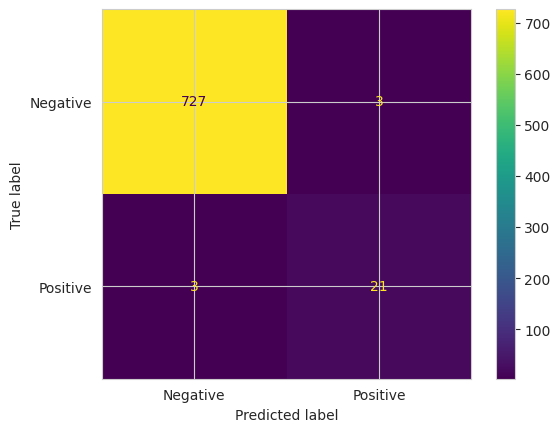

In [ ]:
plt.figure(figsize=(10,6))
cm = metrics.confusion_matrix(y_test, preds, labels=pipeline_full.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.9920424403183024

## Metricas Generales

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       730
           1       0.88      0.88      0.88        24

    accuracy                           0.99       754
   macro avg       0.94      0.94      0.94       754
weighted avg       0.99      0.99      0.99       754



# Conclusiones:




1.   Se niega la hipotesis nula, pues el modelo de ML desarrollado si permite clasificar outliers con una precision alta.
2.   Se comprueba la H4,dado que existen patrones transacciones en los outliers que son detectables.



